In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [3]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import special, stats

from utils import coef_indicator_pce, indicator_pce

sns.set_theme()
sns.set_context("notebook", font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

# 1. Plot of $x \to e^{\frac{-x^2}{2}}\: |\mathrm{He}_n(x)|$

In [4]:
def func_one(n, x):
    """
    Compute exp(-x^2/2) * | He_n(x) | where He_n(x) is the n-th
    probabilists' Hermite polynomial.
    """
    return np.exp(-0.5 * x**2) * np.abs(special.hermitenorm(n)(x))

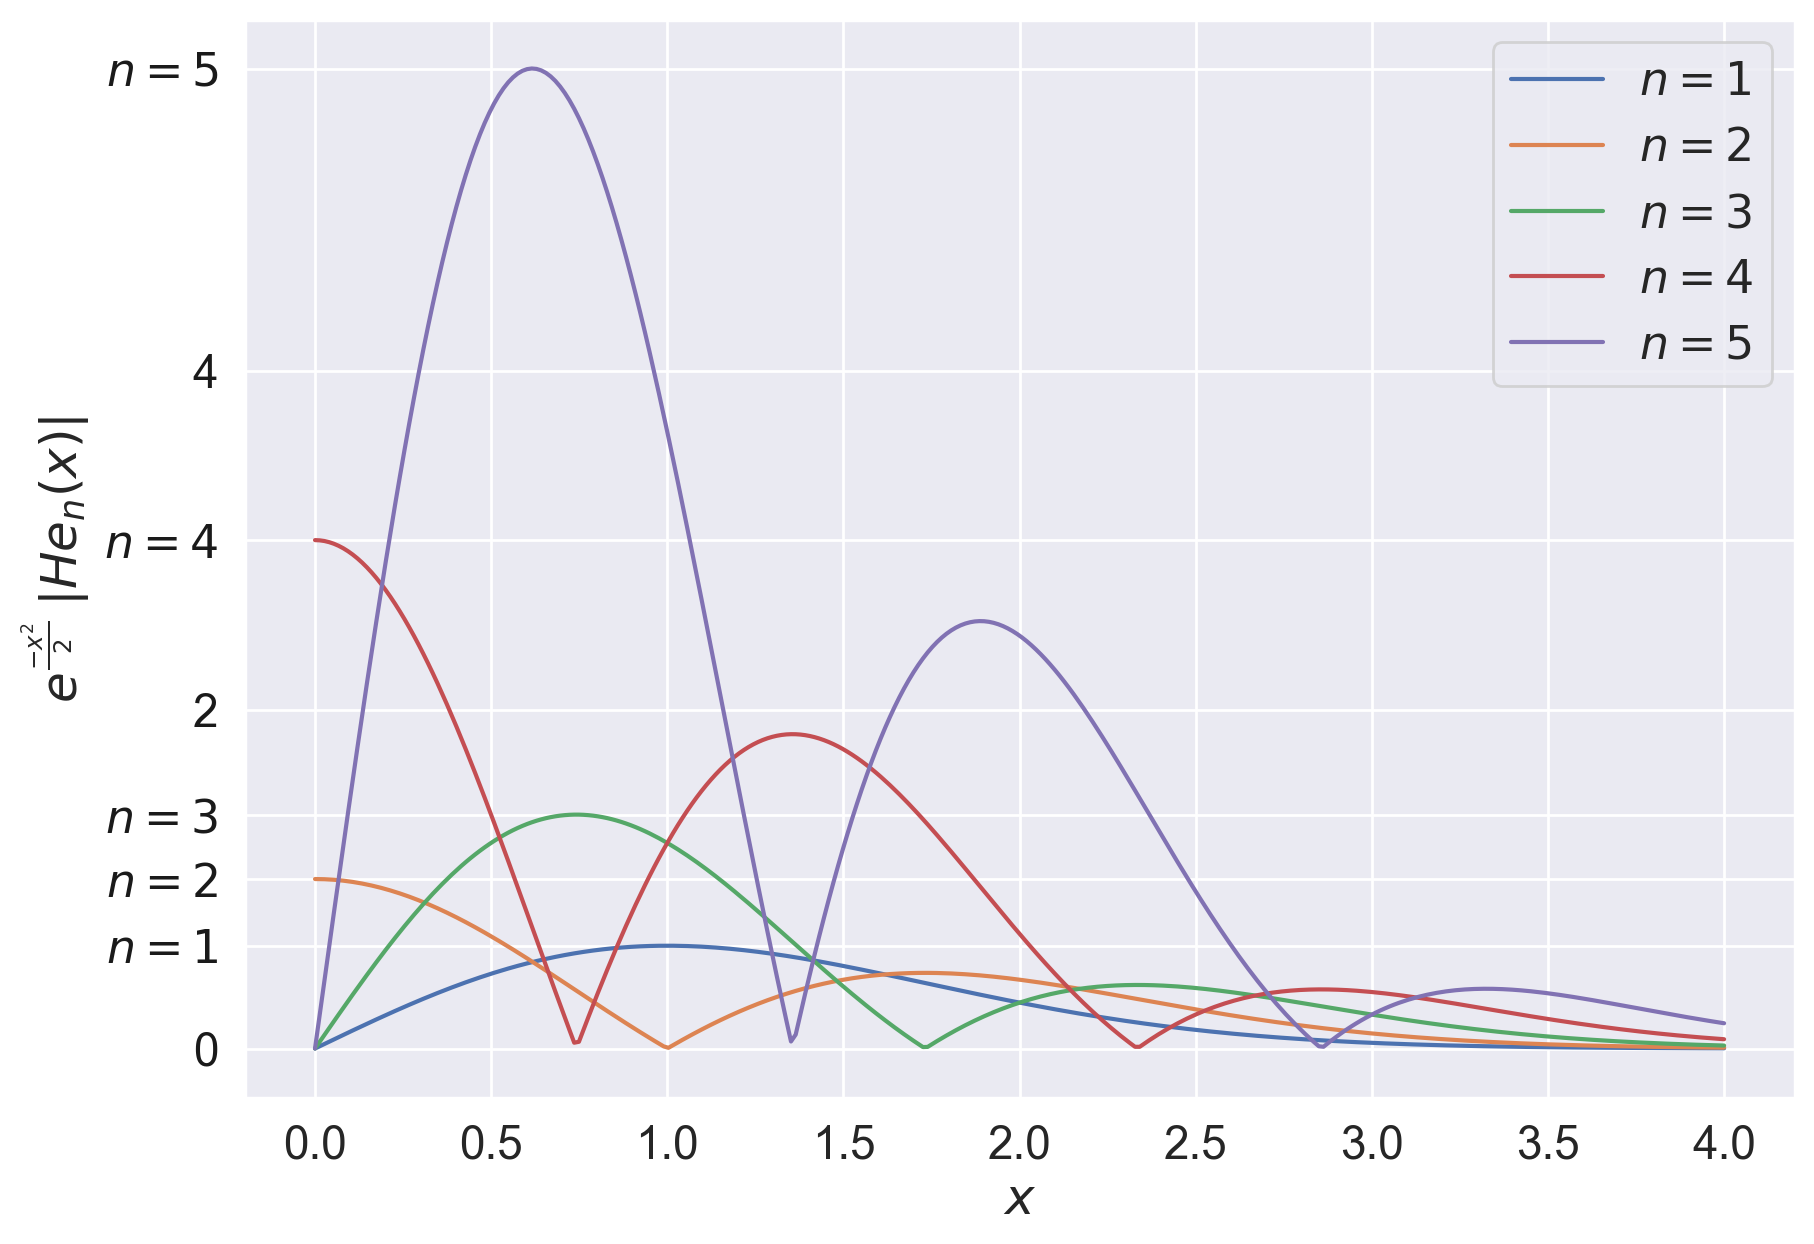

In [5]:
n = 6
x = np.linspace(0, 4, 300)
idx = []
max_func = []

fig, ax = plt.subplots(figsize=(10, 7))
for i in range(1, n):
    func_i = func_one(i, x)
    idx.append(x[np.argmax(func_i)])
    max_func.append(np.max(func_i))
    ax.plot(x, func_i, label=f"$n = {i}$")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$e^{\\frac{-x^2}{2}}\\: |He_n(x)|$")
ax.set_yticks(
    [0, 2, 4] + max_func[:5],
    labels=["0", "2", "4"] + [f"$n={i + 1}$" for i in range(5)],
    color="k",
)
plt.show()

# 2. Plot of $x \to \frac{e^{-x^2} \mathrm{He}_n(x)^2}{(n+1)!}$

In [6]:
def func_two(n, x):
    """
    Compute exp(-x^2) * He_n(x)^2 / (n+1)! where He_n(x) is the n-th
    probabilists' Hermite polynomial.
    """
    return np.exp(-(x**2)) * special.hermitenorm(n)(x) ** 2 / special.factorial(n + 1)

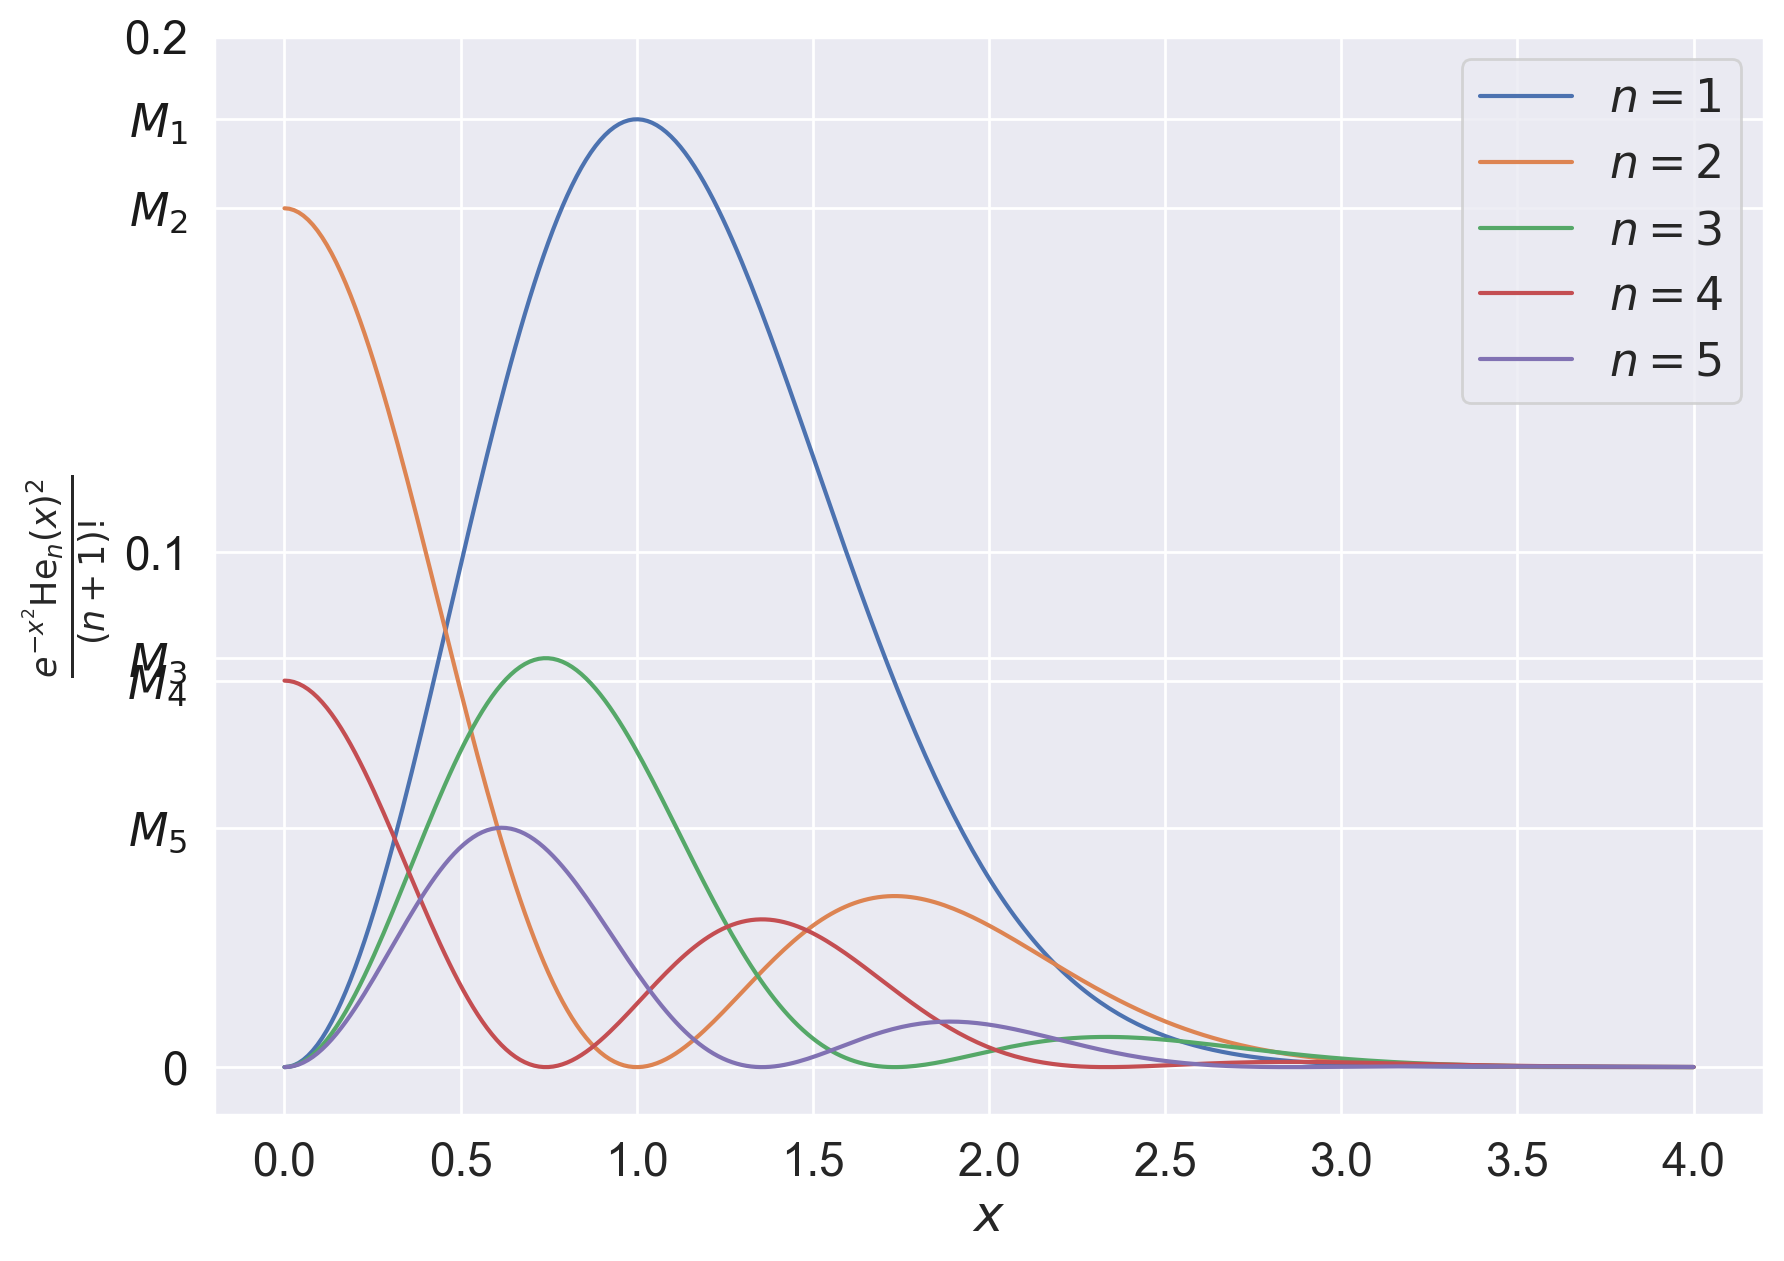

In [7]:
n = 6
x = np.linspace(0, 4, 300)
idx = []
max_zn2 = []

fig, ax = plt.subplots(figsize=(10, 7))
for i in range(1, n):
    func_i = func_two(n=i, x=x)
    idx.append(x[np.argmax(func_i)])
    max_zn2.append(np.max(func_i))
    ax.plot(x, func_i, label=f"$n = {i}$")

ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel(r"$\frac{e^{-x^2} \mathrm{He}_n(x)^2}{(n+1)!}$")
ax.set_yticks(
    [0, 0.1, 0.2] + max_zn2[:5],
    labels=["0", "0.1", "0.2"] + [f"$M_{{{i + 1}}}$" for i in range(5)],
    color="k",
)
plt.show()

# 3. Study of $a_k$ and $b_k$ coefficients

Recall that for every $k \in \{1,\ldots,K\}$,

$$
    a_k = -\frac{\sqrt{1-\rho_k^2}}{|\rho_k|},
    \quad
    b_k = -\frac{\Phi^{-1}(p_k)}{|\rho_k|}.
$$

In [8]:
# Define the grid
p = np.linspace(0.01, 0.1, 100)
rho = np.linspace(0.01, 0.1, 100)

# Compute the values of b
rho_grid, p_grid = np.meshgrid(rho, p)

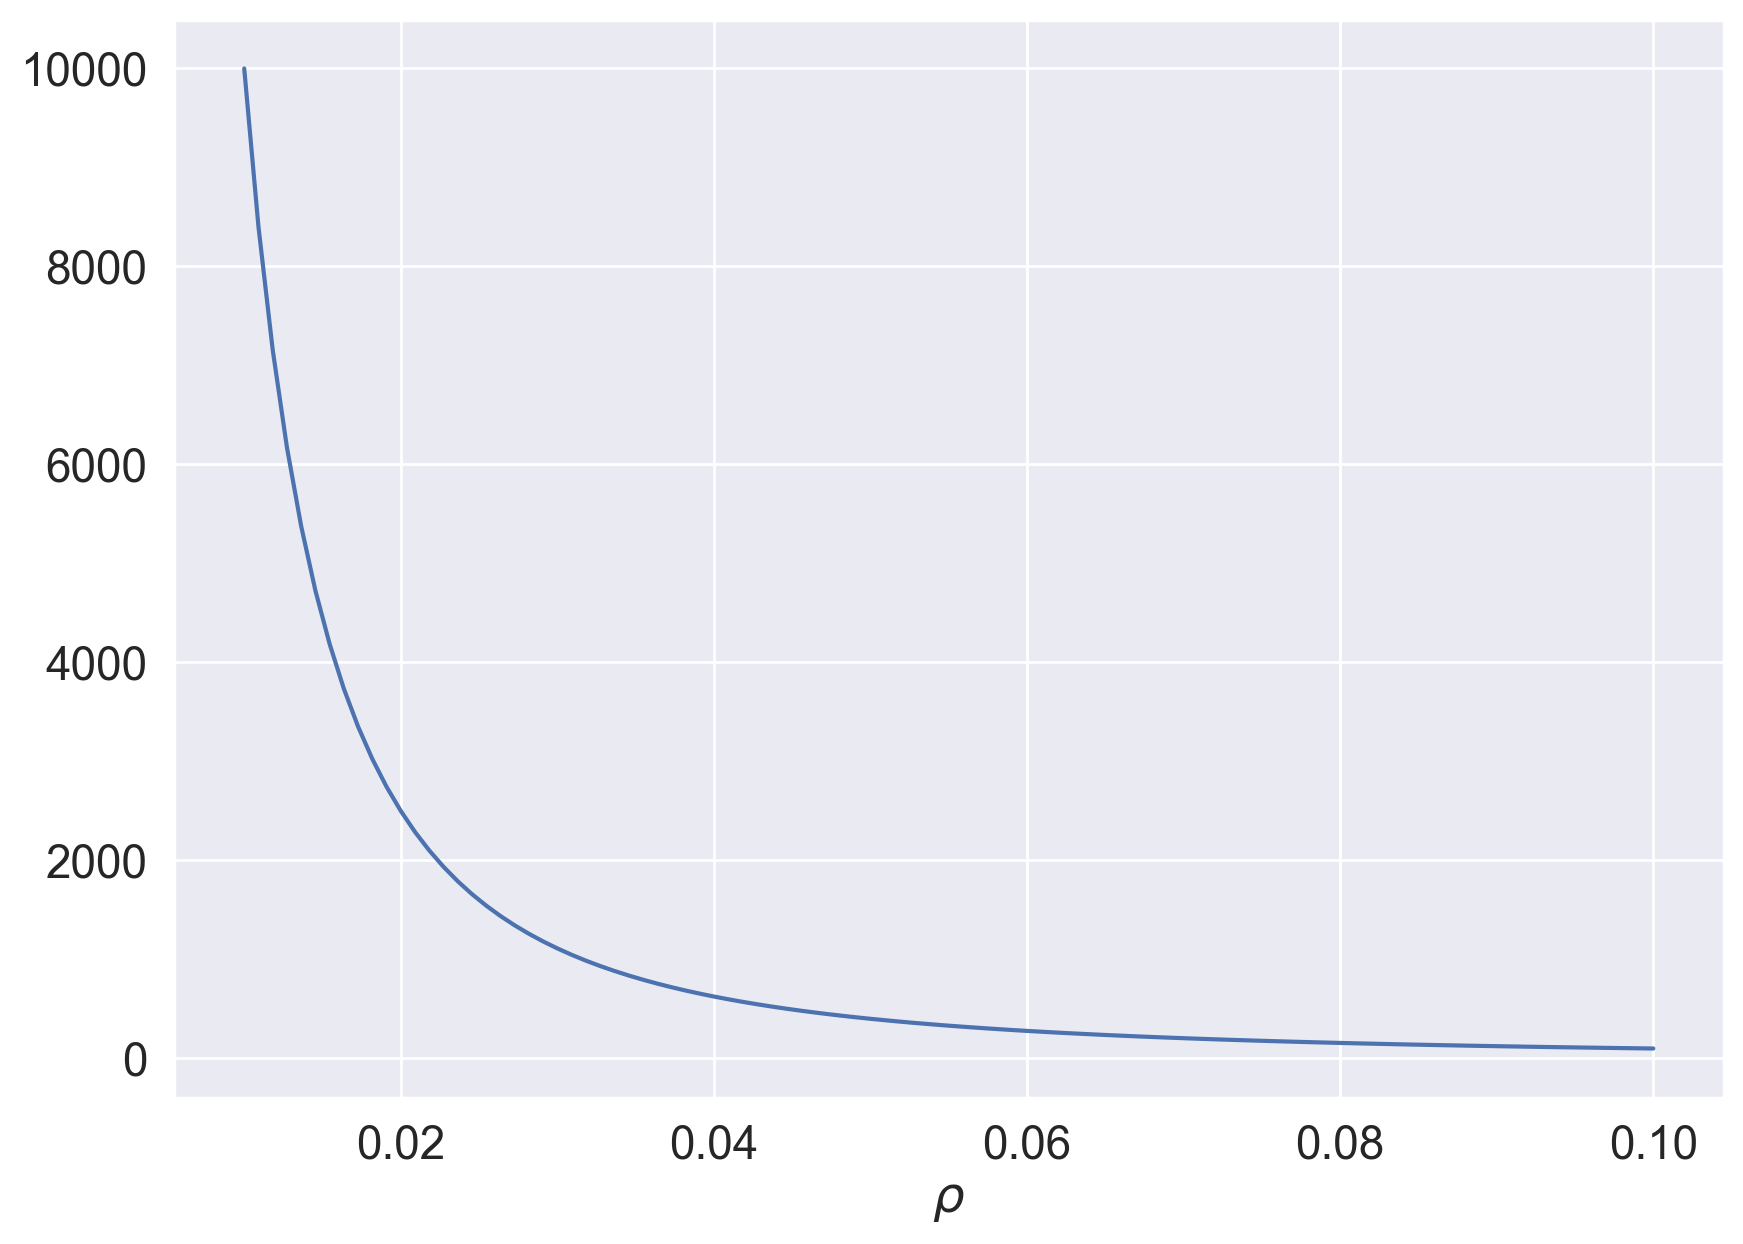

In [9]:
# Plot of rho -> (1-rho^2) / rho^2
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(rho, (1 - rho**2) / rho**2)
ax.set_xlabel(r"$\rho$")
plt.show()

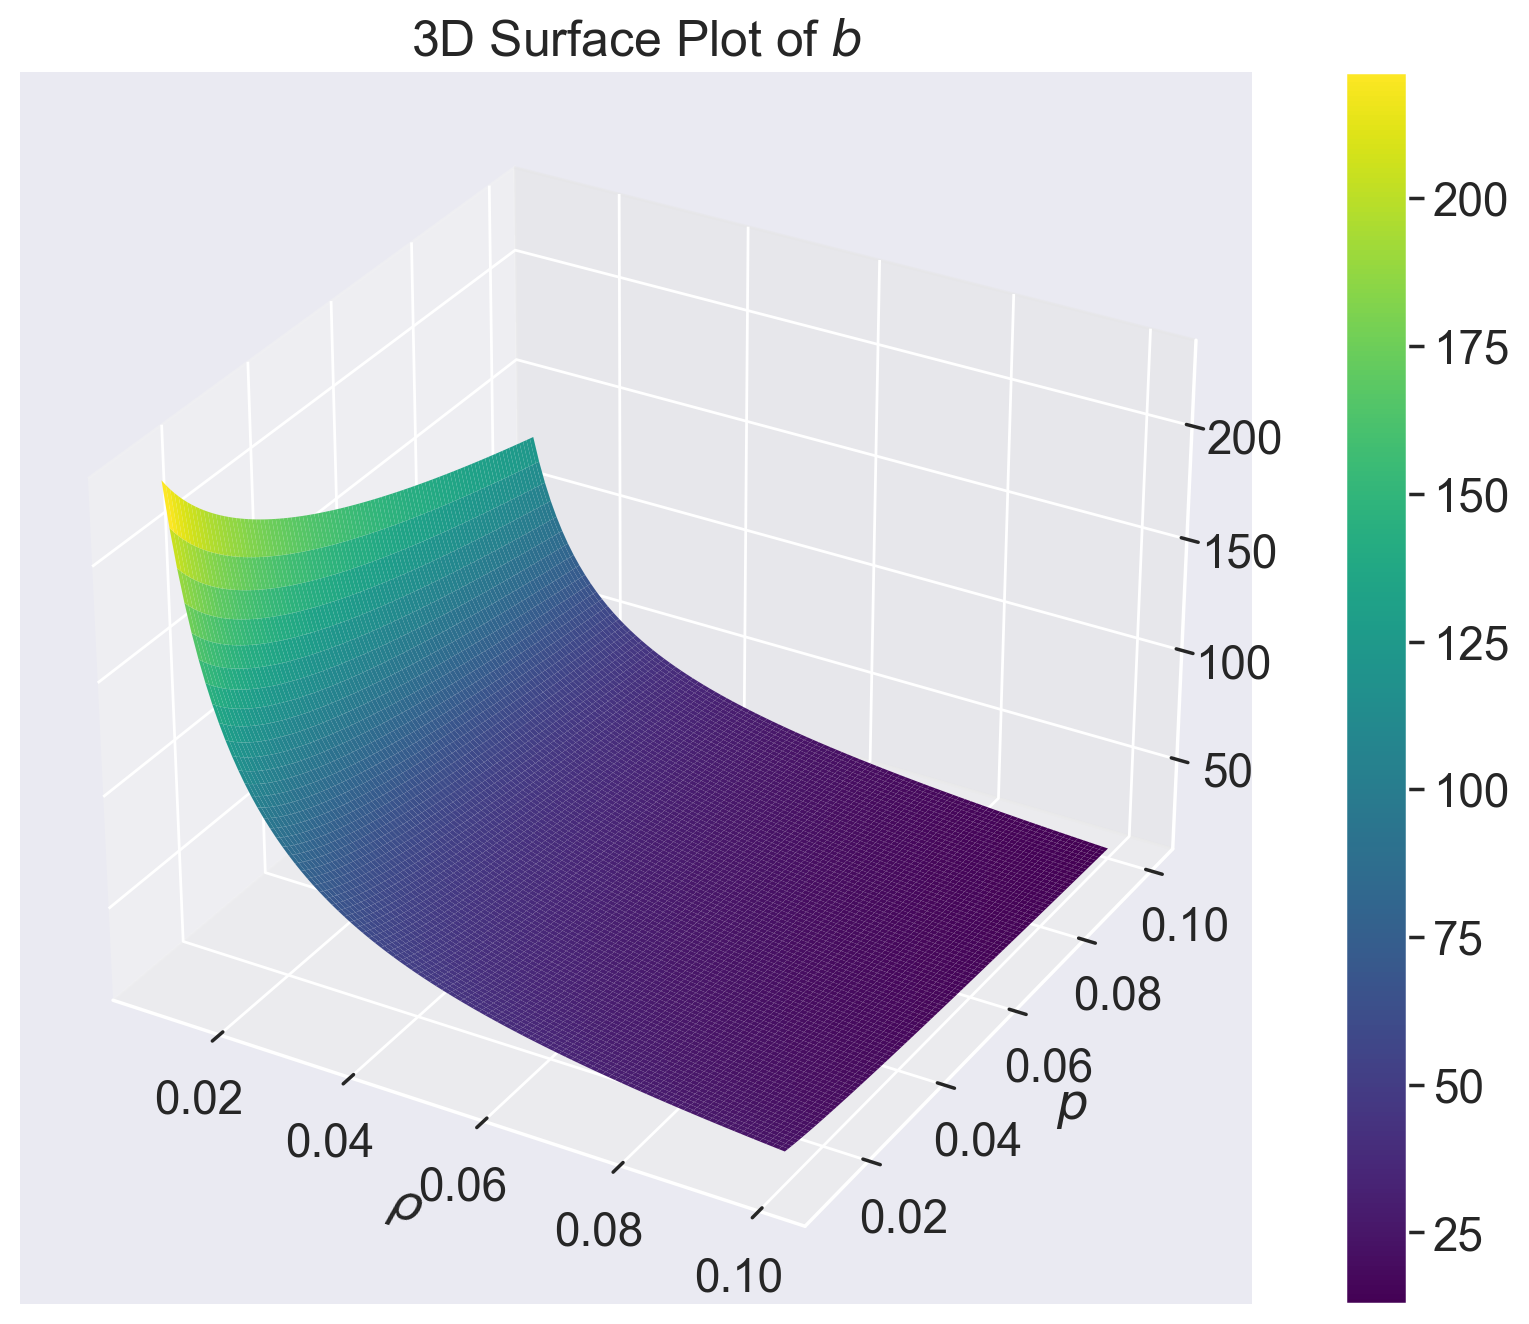

In [10]:
# Plot of (rho, p) -> -Phi^{-1}(p) / rho
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection="3d")

# Plot the surface
surface = ax.plot_surface(
    rho_grid,
    p_grid,
    -stats.norm.ppf(p_grid) / rho_grid,
    rstride=1,
    cstride=1,
    cmap=cm.viridis,
    edgecolor="none",
)

# Add a color bar
plt.colorbar(surface, ax=ax)

# Add labels and title
ax.set_title("3D Surface Plot of $b$")
ax.set_xlabel("$\\rho$")
ax.set_ylabel("$p$")

plt.show()

# 4. PCE of indicator function

Figure 4: $I$-chaos decompositions for $c\leq Z$ with $I \in \{ 5,20,50,80\}$ 
and $c\in \{-1,0,1,2\}$ .

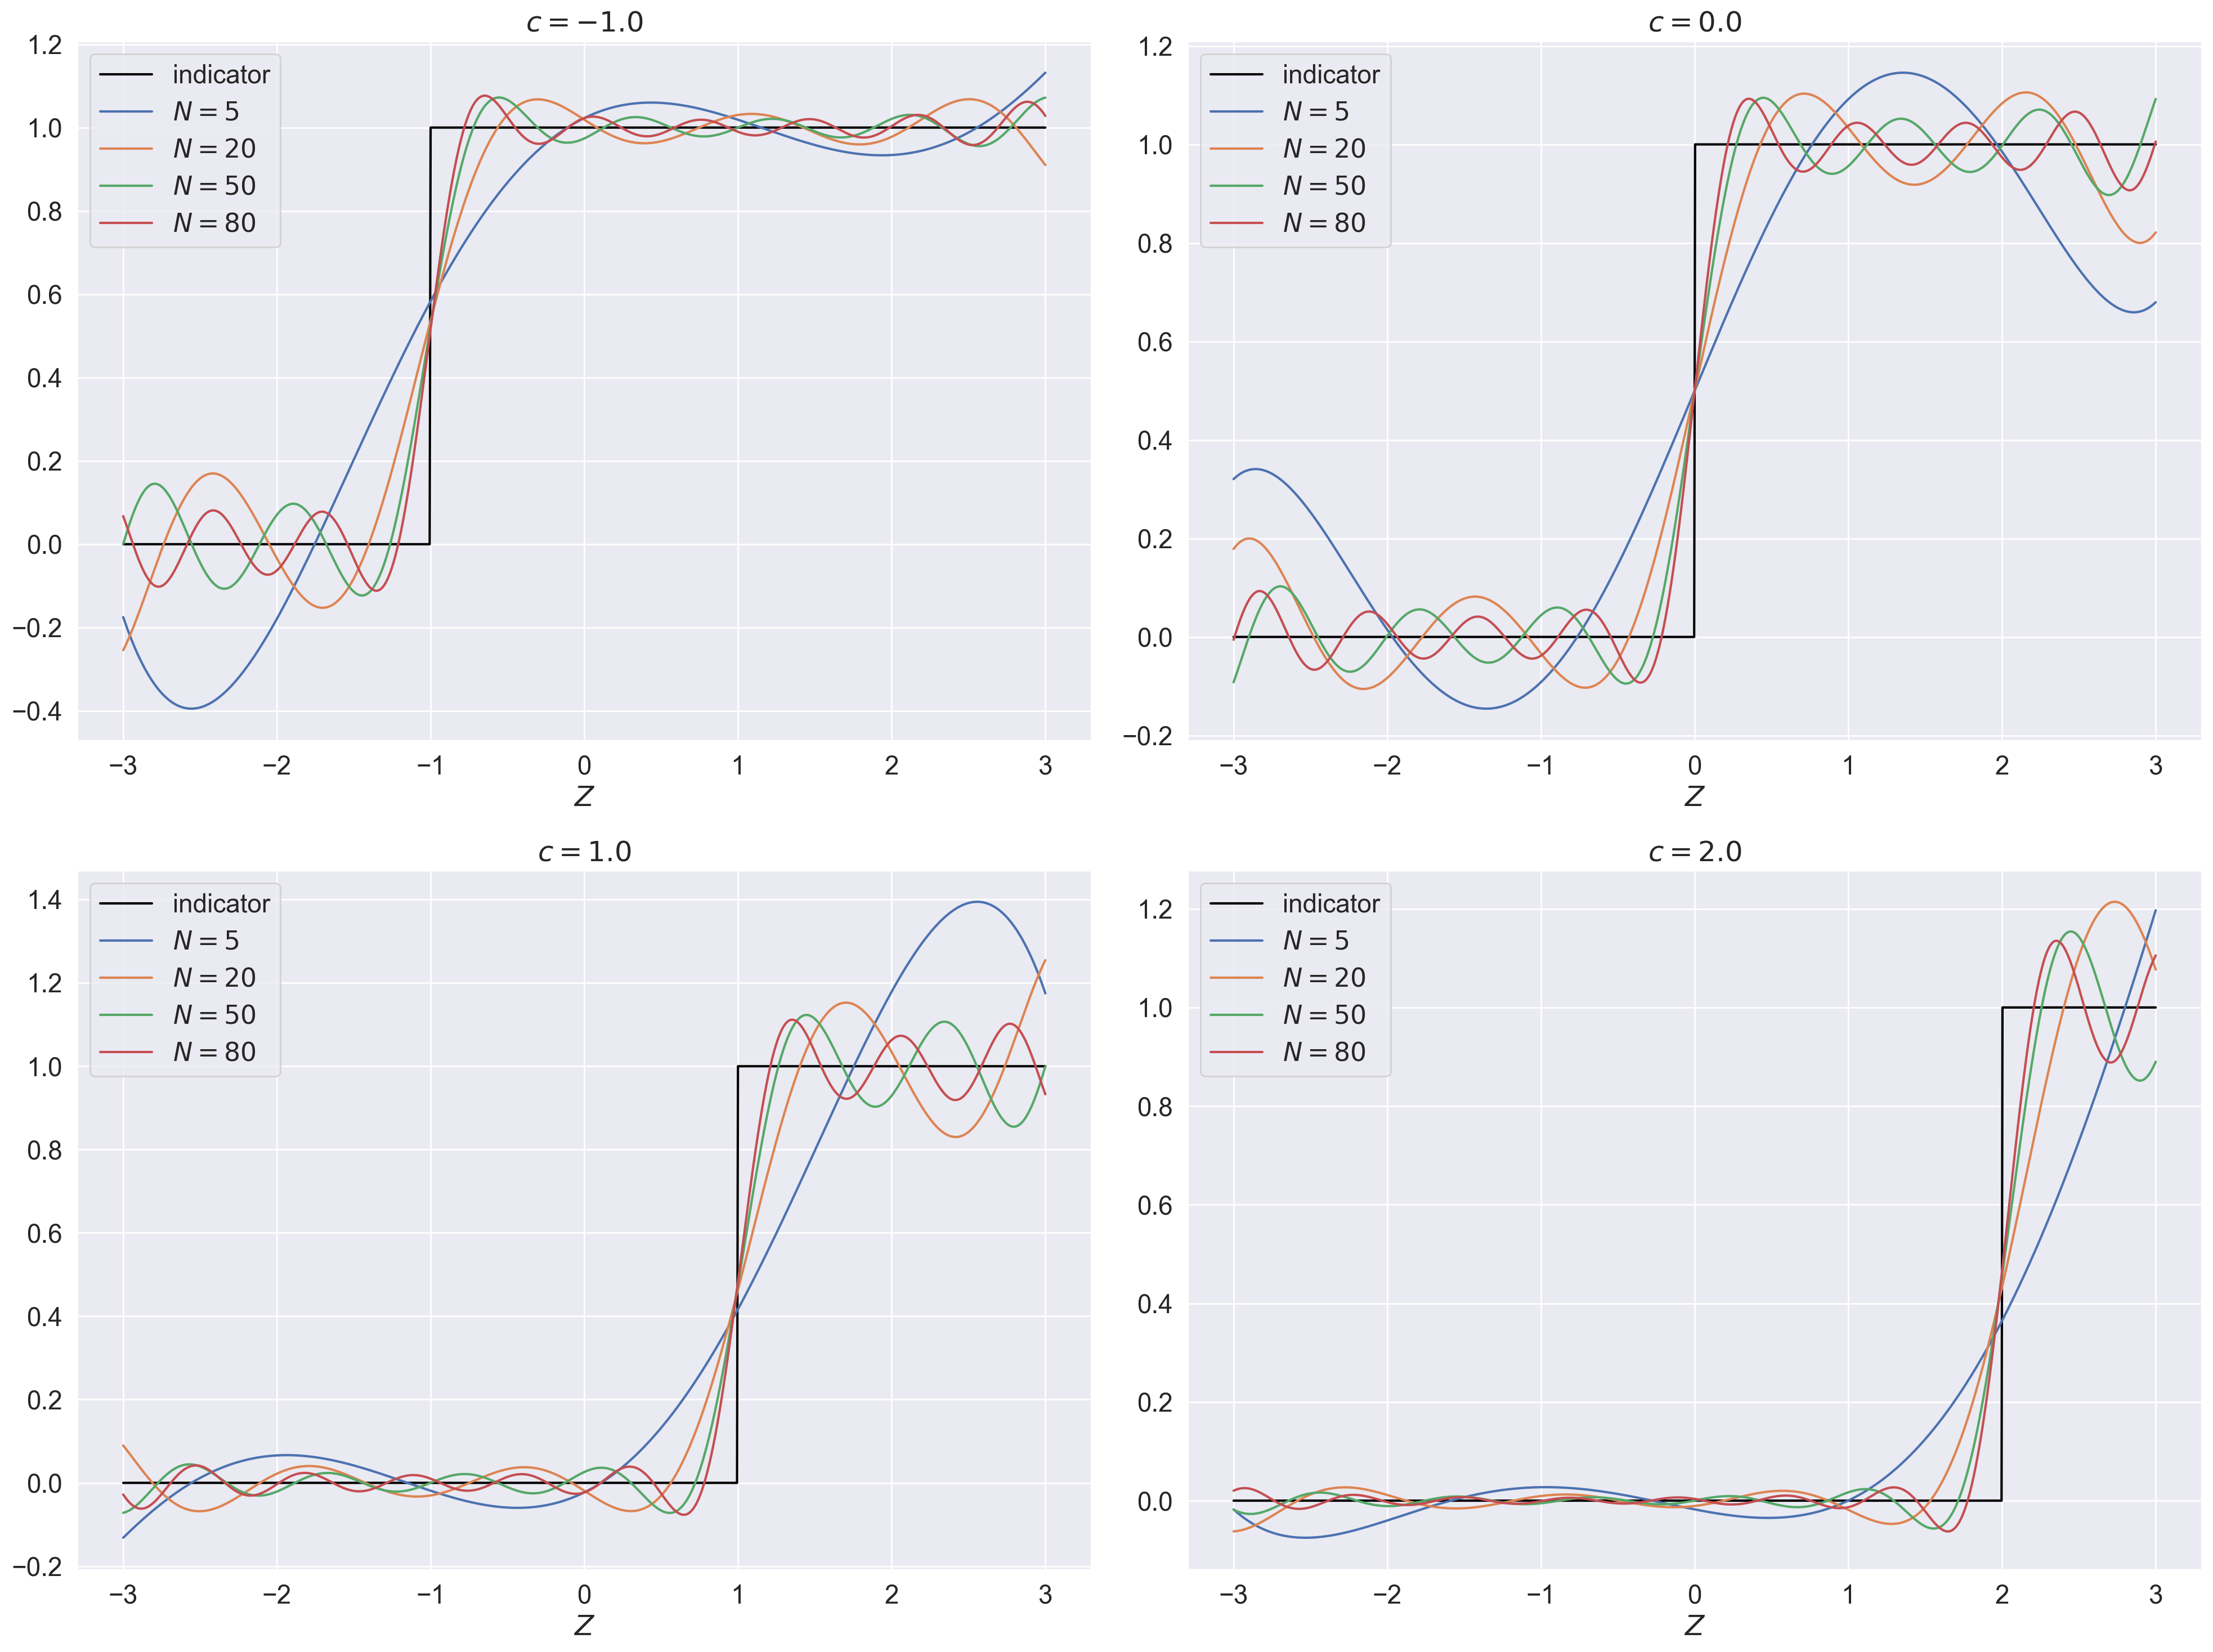

In [20]:
from numpy.polynomial.hermite_e import hermeval

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

range_i = [5, 20, 50, 80]
z = np.linspace(start=-3, stop=3, num=10**3)
tab_c = np.array([-1.0, 0.0, 1.0, 2.0])

for c, ax in zip(tab_c, axes):
    ind_c = 1.0 * (c <= z)
    ax.plot(z, ind_c, color="black", label="indicator")
    for i in range_i:
        ax.plot(z, indicator_pce(c, z=z, n_pce=i), label=f"$N = {i}$")
    ax.legend()
    ax.set_title(f"$c = {c}$")
    ax.set_xlabel("$Z$")

plt.tight_layout()
plt.show()

Figure 5. $I$-chaos decompositions for $0\leq Z$ with $I \in \{ 5,20,50,80\}$ to illustrate extreme amplitudes in the tails.

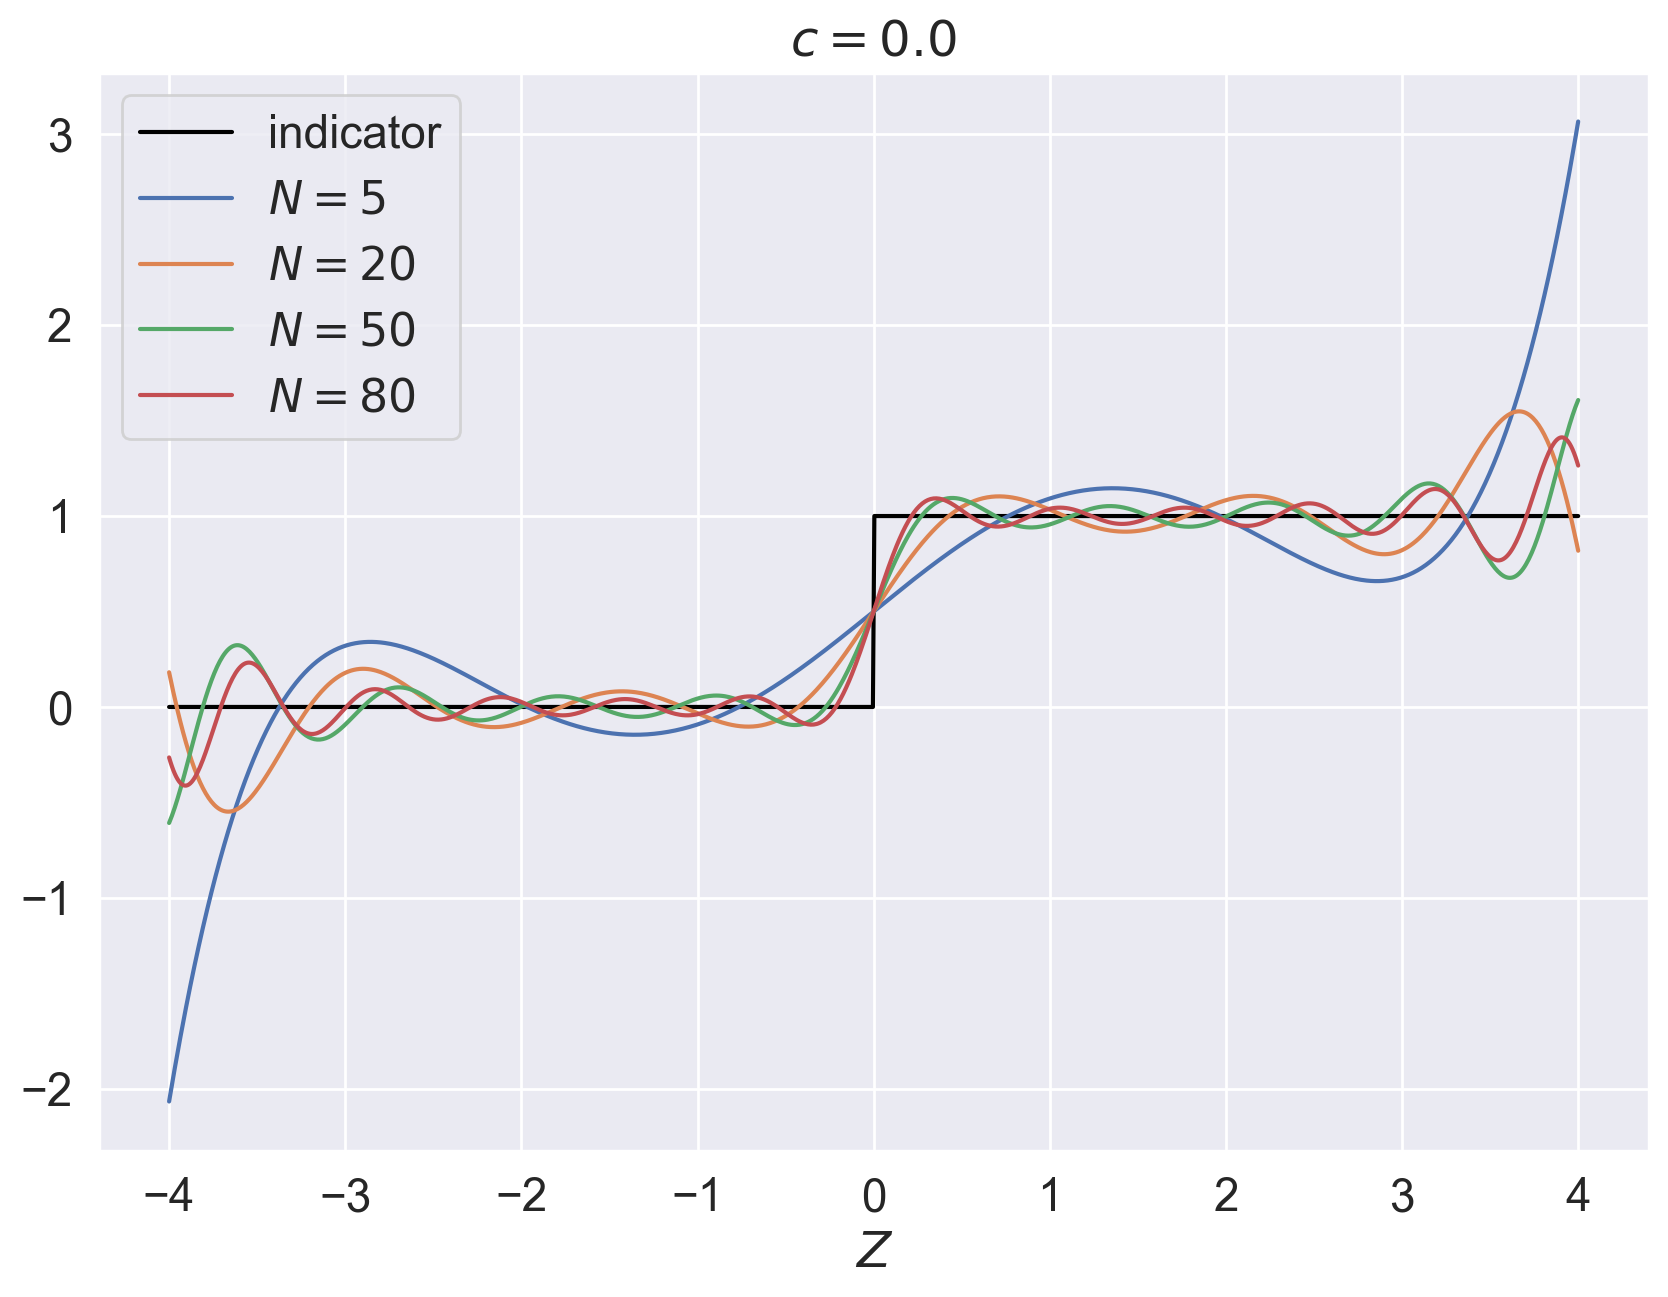

In [19]:
c = 0.0
z = np.linspace(start=-4, stop=4, num=10**3)

fig, ax = plt.subplots(figsize=(10, 7))
ind_c = 1.0 * (c <= z)
ax.plot(z, ind_c, color="black", label="indicator")
for i in range_i:
    ax.plot(z, indicator_pce(c, z=z, n_pce=i), label=f"$N = {i}$")
ax.legend()
ax.set_title(f"$c = {c}$")
ax.set_xlabel("$Z$")
plt.show()

# 5. Study of the L2 error

$\log \bigl( \mathbb{E} \bigl[ | 1_{c \leq Z} - \sum_{i=0}^{I}
\alpha_{i}(c) \mathrm{He}_i(Z)|^2\bigr] \bigr)$ w.r.t. $\log(I)$ for $c\in \{-1,0,1,2\}$.

c =  -1.0
c =  0.0
c =  1.0
c =  2.0


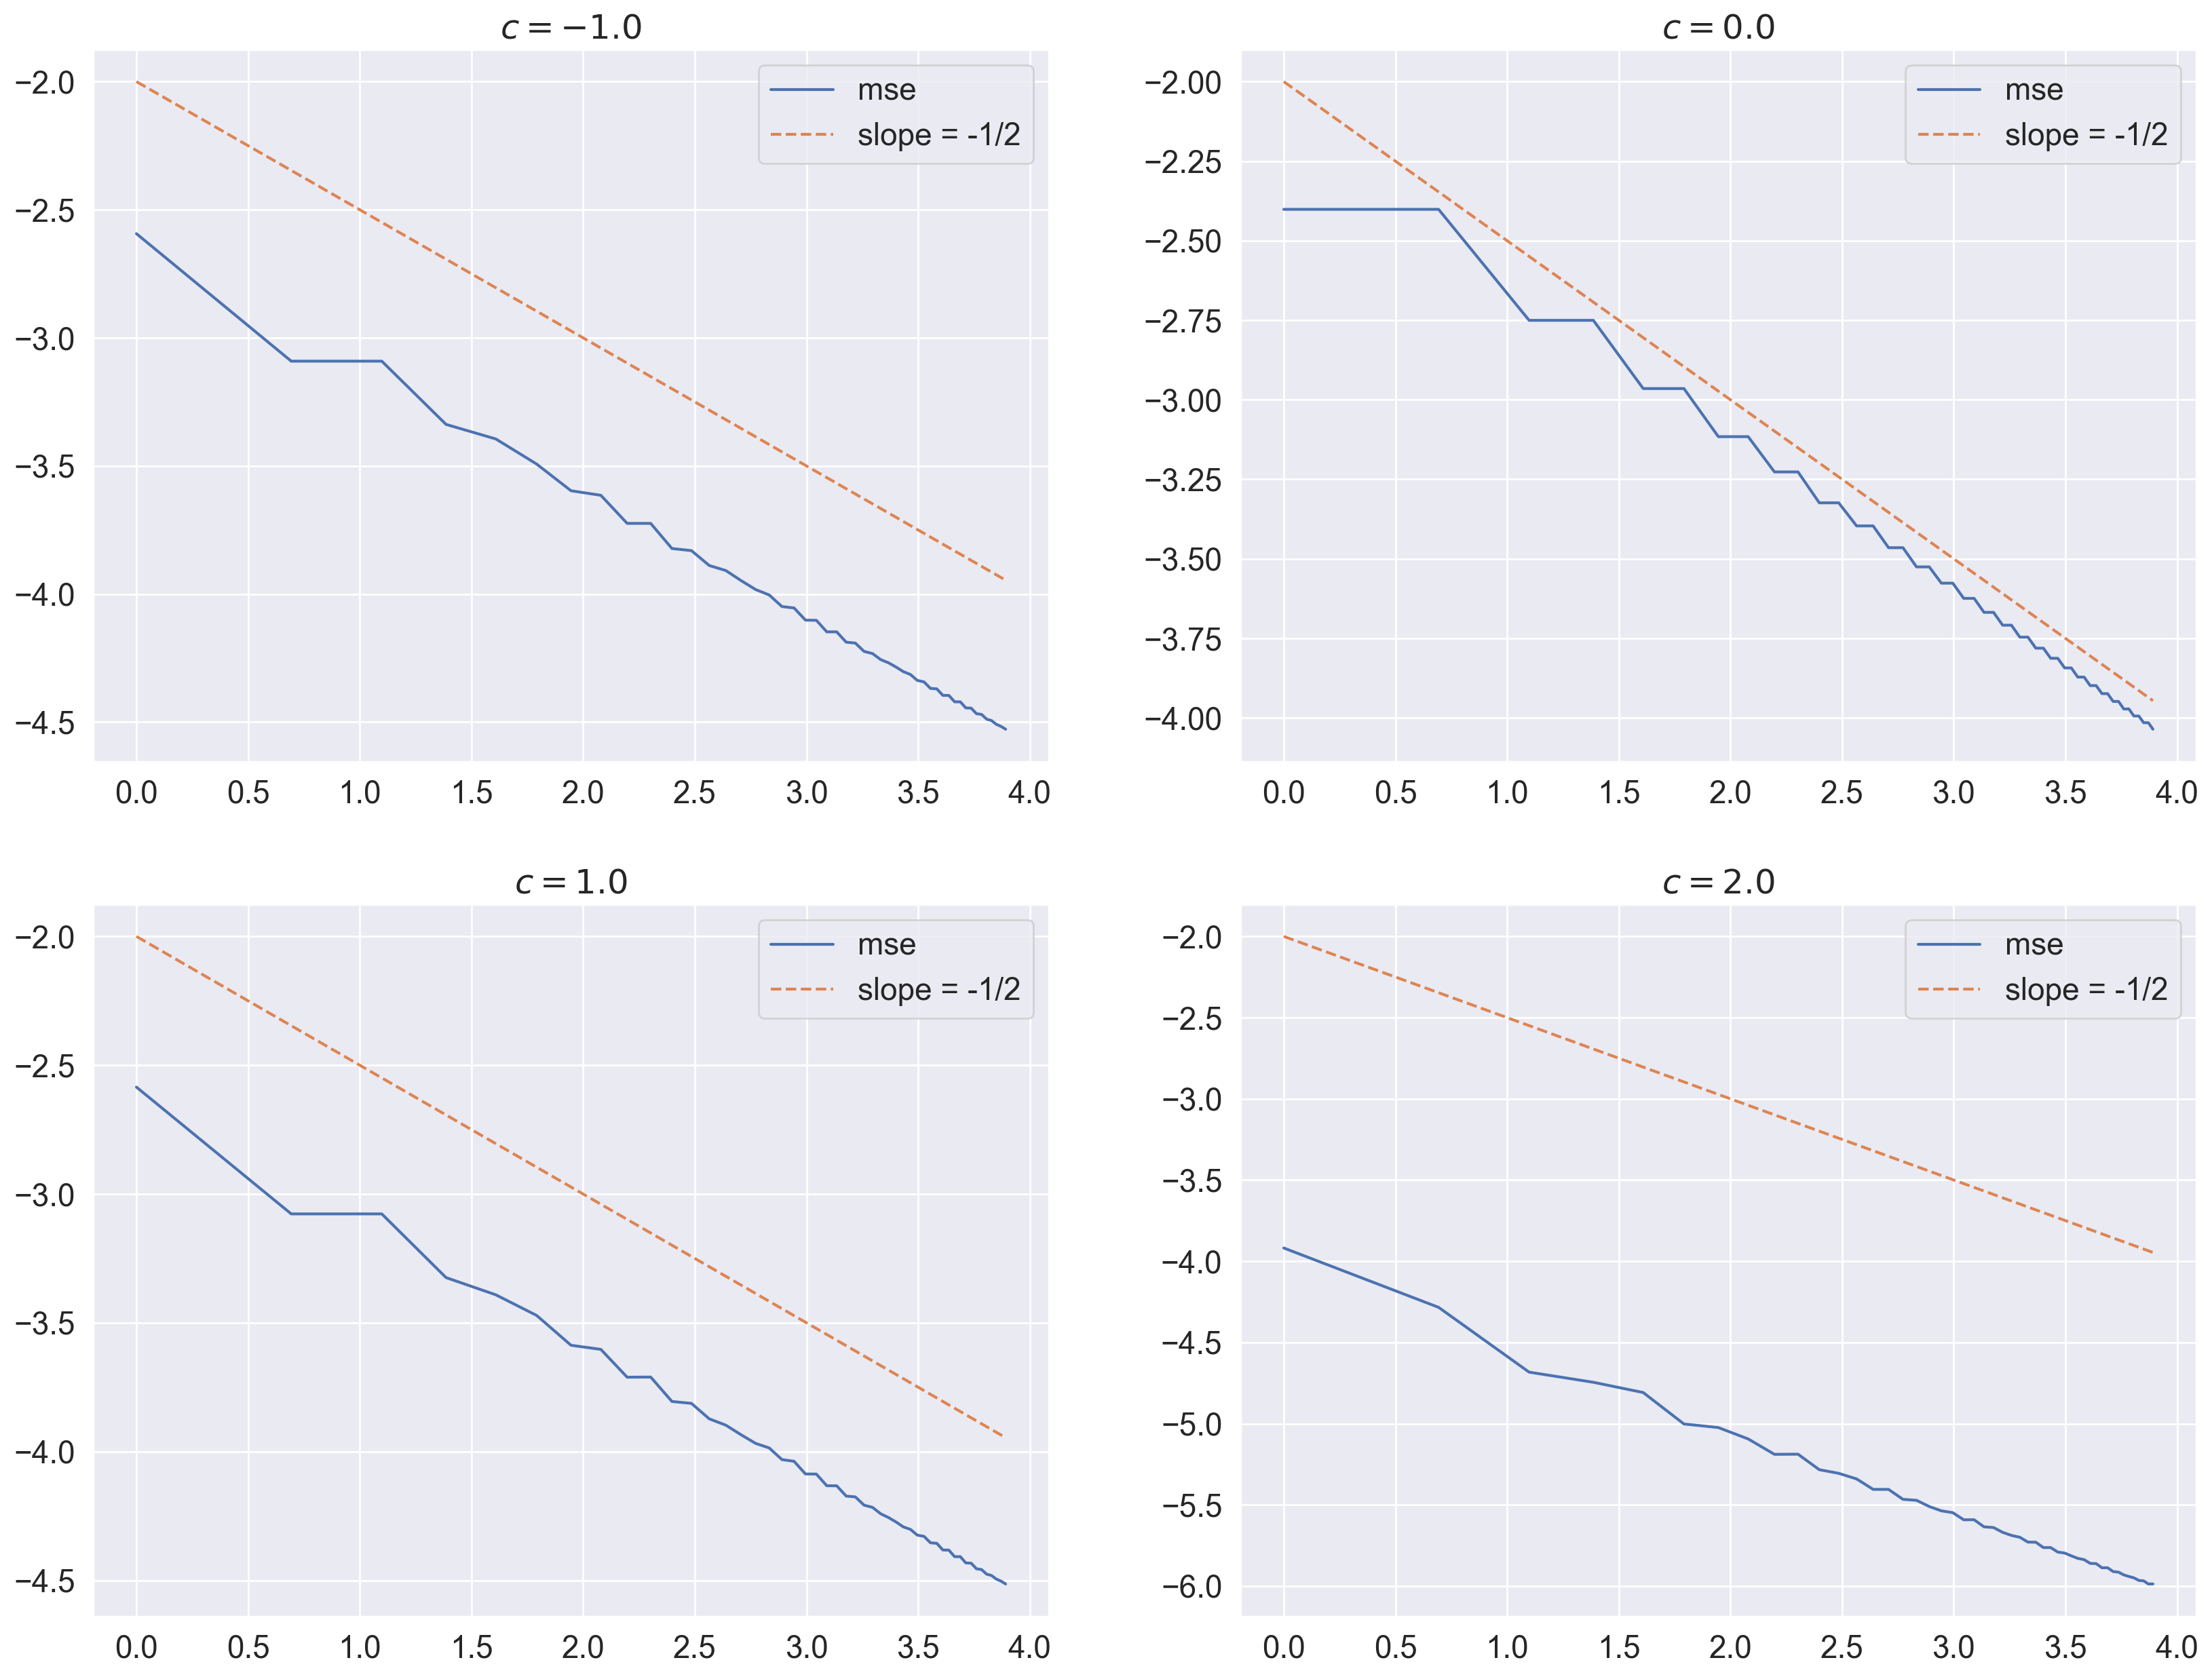

In [ ]:
n_mc = 1 * 10**5
I_max = 50
tab_i = np.arange(1, I_max)
Z = np.random.randn(n_mc)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

list_c = [-1.0, 0.0, 1.0, 2.0]
for c, ax in zip(list_c, axes):
    print("c = ", c)
    mse_i = np.zeros(I_max - 1)
    for n in tab_i:
        ind_c = np.array([int(c <= x) for x in Z])
        chaos = indicator_pce(c, z=Z, n_pce=int(n))
        mse_i[n - 1] = np.mean((ind_c - chaos) ** 2)
    ax.plot(np.log(tab_i), np.log(mse_i), label="mse")
    ax.plot(
        np.log(tab_i), -0.5 * np.log(tab_i) - 2, linestyle="--", label="slope = -1/2"
    )
    ax.legend()
    ax.tick_params(axis="both", which="major")
    ax.set_title(f"$c = {c}$")
plt.show()

# 6. Study of Portfolio A 

- **Portfolio A (homogeneous portfolio)**

    $$
    \forall{k\in \{1,...,K\}}, 
    \quad p_k = p, \quad \rho_k = \rho, 
    \quad \ell_k = \frac{1}{\sqrt{k}}
    $$

- **Portfolio B (heterogeneous portfolio)**
    $$ 
    \forall k\in\{ 1,\dots, K\}, 
    \quad p_{k}=0.01\left(1+\sin\left(\frac{16\pi k}{K}\right)\right) + 0.001, 
    \quad \rho_k \sim U([0,1/\sqrt{10}])
    \quad \ell_{k}=\left(\left\lceil \frac{5k}{K}\right\rceil \right)^{2}, 
    $$

    Note in that case, the marginal default probabilities vary between $0\%$ and $2\%$ with a mean $1\%$, and the losses $l_{k}$ are $1, 4, 9, 16, 25$ with $K/5$ at each level.

In [ ]:
# Set model parameters

K = 5 * 10**5  # number of obligors
range_k = np.arange(1, K + 1)
n_mc = 1 * 10**4  # number of simulations

portfolio = "A"

if portfolio == "A":
    p_k = 1e-2 * np.ones(K)  # default probability
    rho_k = 0.1 * np.ones(K)  # correlation
    loss_k = range_k ** (-0.5)  # loss given default
elif portfolio == "B":
    p_k = 1e-2 * (1 + np.sin((16.0 * np.pi * range_k) / K)) + 1e-3
    loss_k = np.ceil(5.0 * range_k / K) ** 2
    rho_k = np.random.uniform(0.0, 1.0 / np.sqrt(10.0), size=K) + 1e-3
else:
    raise ValueError("Unknown portfolio")

b_k = -stats.norm.ppf(p_k) / rho_k  # mean
a_k = -np.sqrt(1 - rho_k**2) / rho_k  # variance

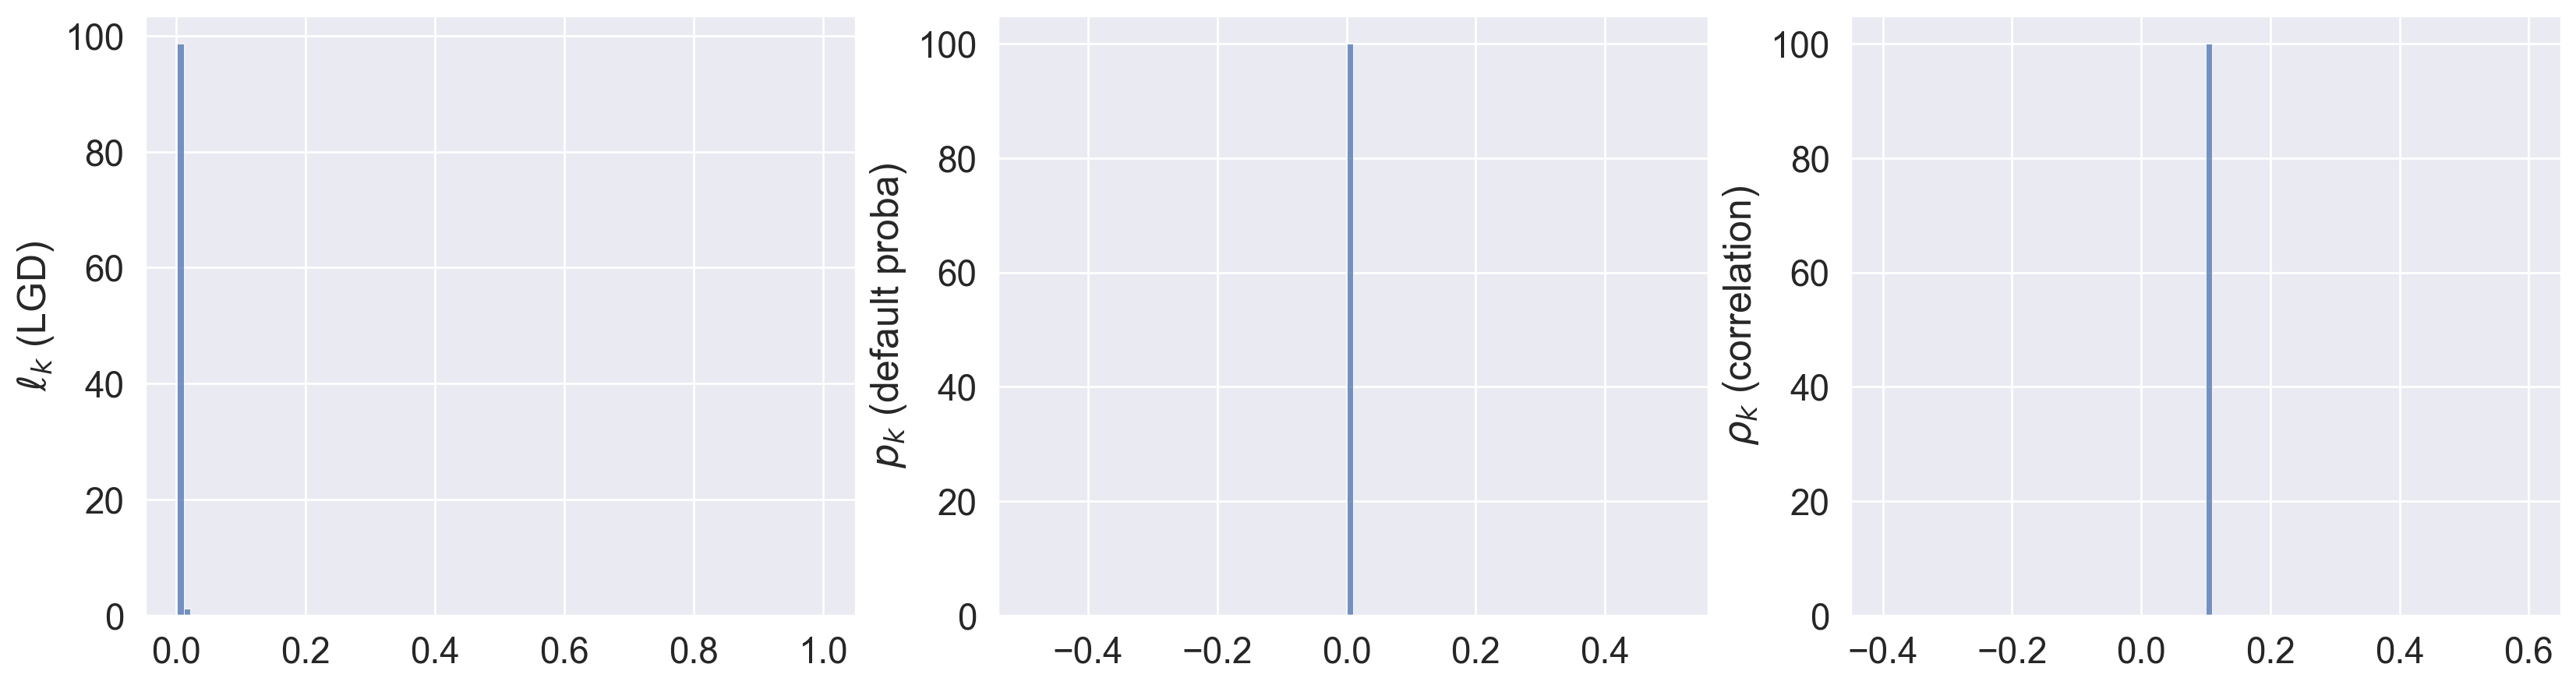

In [ ]:
# Plot model parameters
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.histplot(loss_k, kde=False, stat="density", ax=ax1, bins=100)
ax1.set_ylabel("$\\ell_k$ (LGD)")
ax1.tick_params(axis="both", which="major")

sns.histplot(p_k, kde=False, stat="density", ax=ax2, bins=100)
ax2.set_ylabel("$p_k$ (default proba)")
ax2.tick_params(axis="both", which="major")

sns.histplot(rho_k, kde=False, stat="density", ax=ax3, bins=100)
ax3.set_ylabel("$\\rho_k$ (correlation)")
ax3.tick_params(axis="both", which="major")

plt.show()

## 6.1 Study of $\epsilon_{K,i}$

Histograms of $\varepsilon_{K,i}$ 
with the p.d.f. of $\mathcal{N}(\mathbb{E} [\varepsilon_{K,i}], \text{Var}[\varepsilon_{K,i}])$ 
for $i\in \{1,3,6,9\}$.

In [ ]:
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

i = 1
print("iteration : ", i)
eps_K_i = np.zeros(n_mc)
for n in range(n_mc):
    if n % 1000 == 0:
        print("n = ", n)
    x_k = a_k * np.random.randn(K) + b_k
    eps_K_i[n] = np.dot(loss_k, coef_indicator_pce(i, x_k))
N_i = np.sqrt(s_K[i, i]) * np.random.randn(K) + m_K[i]

sns.histplot(eps_K_i, kde=False, stat="density", ax=ax1, bins=100)
sns.kdeplot(N_i, ax=ax1, color="orange")
ax1.set_title(f"$i = {i}$")
ax1.tick_params(axis="both", which="major", labelsize=15)

# i = 3
# print("iteration : ", i)
# eps_K_i = np.zeros(N)
# for n in range(N):
#     if n % 1000 == 0:
#         print("n = ", n)
#     X_K = ak * np.random.randn(K) + bk
#     eps_K_i[n] = np.dot(lk, alpha(i, X_K))
# N_i = np.sqrt(s_K[i, i]) * np.random.randn(M) + m_K[i]

# sns.distplot(eps_K_i, kde=False, norm_hist=True, ax=ax2)
# sns.distplot(N_i, hist=False, kde=True, norm_hist=True, ax=ax2)
# ax2.set_title("$i = {0}$".format(i), fontsize=20)
# ax2.tick_params(axis="both", which="major", labelsize=15)

# i = 6
# print("iteration : ", i)
# eps_K_i = np.zeros(N)
# for n in range(N):
#     if n % 1000 == 0:
#         print("n = ", n)
#     X_K = ak * np.random.randn(K) + bk
#     eps_K_i[n] = np.dot(lk, alpha(i, X_K))
# N_i = np.sqrt(s_K[i, i]) * np.random.randn(M) + m_K[i]

# sns.distplot(eps_K_i, kde=False, norm_hist=True, ax=ax3)
# sns.distplot(N_i, hist=False, kde=True, norm_hist=True, ax=ax3)
# ax3.set_title("$i = {0}$".format(i), fontsize=20)
# ax3.tick_params(axis="both", which="major", labelsize=15)

# i = 9
# print("iteration : ", i)
# eps_K_i = np.zeros(N)
# for n in range(N):
#     if n % 1000 == 0:
#         print("n = ", n)
#     X_K = ak * np.random.randn(K) + bk
#     eps_K_i[n] = np.dot(lk, alpha(i, X_K))
# N_i = np.sqrt(s_K[i, i]) * np.random.randn(M) + m_K[i]

# sns.distplot(eps_K_i, kde=False, norm_hist=True, ax=ax4)
# sns.distplot(N_i, hist=False, kde=True, norm_hist=True, ax=ax4)
# ax4.set_title("$i = {0}$".format(i), fontsize=20)
# ax4.tick_params(axis="both", which="major", labelsize=15)

# plt.show()

## 6.2 Kernel density estimation of $\mathcal{L}$ and $\hat{\mathcal{L}}_{I}$ conditionally on $Z$

## 6.3 Kernel density estimation of $\mathcal{L}$ and $\mathcal{L}_{I}^{G}$

## 6.4 Q-Q plot